# Morse Decoder

Trying to decode morse code WAV files to text

## References

- https://www.youtube.com/watch?v=ylhAsdNq5IE
- https://github.com/mkouhia/morse-audio-decoder/blob/main/notebooks/2022-02-23%20Wundernut%2011%20exploration.ipynb
- https://en.wikipedia.org/wiki/Morse_code#/media/File:International_Morse_Code.svg

In [1]:
# opened in https://morsecode.world/international/decoder/audio-decoder-adaptive.html
# E C H O Q U E B E C U N I F O R M A L F A L I M A S I E R R A S I E R R A I N D I A G O L F N O V E M B E R

# E C H O 
# Q U E B E C
# U N I F O R M 
# A L F A 
# L I M A 
# S I E R R A 
# S I E R R A 
# I N D I A 
# G O L F
# N O V E M B E R

# EQUALS SIGN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.io.wavfile as wav
import scipy.signal as signal
import scipy.fft as fft

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/home/barrett/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def read_wav(filename):
    try:
        sample_rate, samples = wav.read(filename)
        return sample_rate, samples
    except Exception as e:
        print("Error reading WAV file:", str(e))
        return None, None

In [4]:
input_wav = "./repo/data"
sample_rate, audio = read_wav(input_wav)

print('sample rate:', sample_rate)
print('audio:', audio)
print(audio.shape, audio.dtype)

sample rate: 11050
audio: [128 128 129 ... 128 128 128]
(278850,) uint8


In [5]:
print(audio[0:500])

[128 128 129 129 129 127 125 123 122 122 125 129 134 137 138 135 130 124
 118 114 114 118 125 134 142 146 145 139 128 117 108 105 107 116 129 142
 152 155 150 138 123 108  98  97 104 118 136 152 162 162 152 134 114  97
  88  91 104 124 146 164 171 166 150 127 103  86  80  88 107 133 158 175
 179 168 145 116  90  74  74  88 115 145 172 186 183 165 135 103  77  65
  71  93 126 160 185 194 185 158 123  88  64  58  71 102 140 175 197 200
 182 148 107  72  52  54  77 114 156 190 207 201 174 133  90  57  44  55
  86 130 174 205 214 199 163 116  73  44  39  60 100 148 191 216 217 191
 147  97  55  34  39  69 117 168 207 225 215 179 129  78  40  27  43  83
 136 187 221 229 208 163 108  59  28  26  52 101 157 205 232 228 196 144
  87  41  20  29  66 121 179 221 238 223 180 123  66  27  16  37  84 143
 199 234 239 212 161 100  47  16  17  50 105 166 217 242 235 197 139  78
  30  11  24  67 128 188 231 245 226 178 116  57  18  10  36  88 151 208
 242 243 212 156  92  39  10  15  52 111 174 224 24

Text(0, 0.5, 'Magnitude')

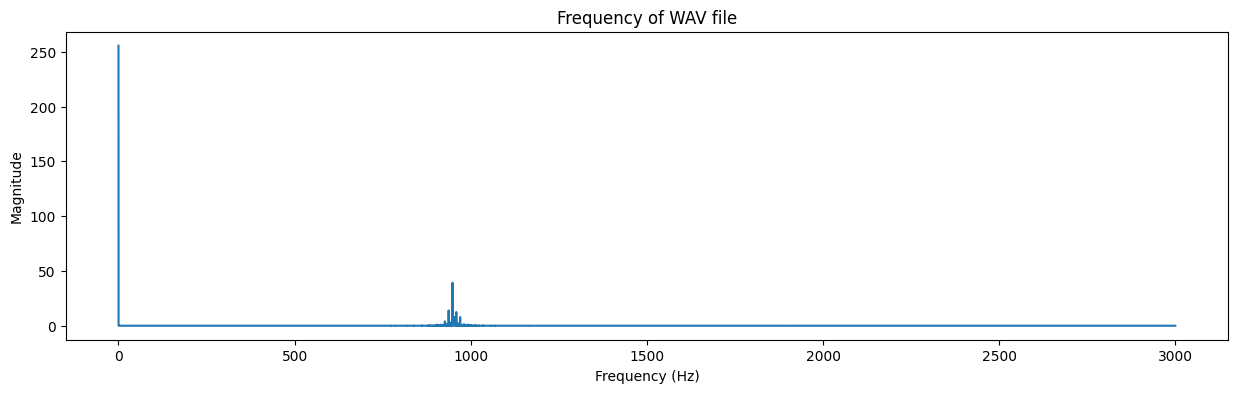

In [6]:
t = np.arange(len(audio)) / sample_rate
yf = 2.0 / len(audio) * np.abs(fft.fft(audio)[:len(audio) // 2])
xf = fft.fftfreq(len(audio), 1 / sample_rate)[:len(audio) // 2]

fig, ax = plt.subplots(figsize=(15,4))
ax.plot(xf[xf < 3000], yf[xf < 3000])
ax.set_title('Frequency of WAV file')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')

TODO: downsample? 11KHz seems excessive...

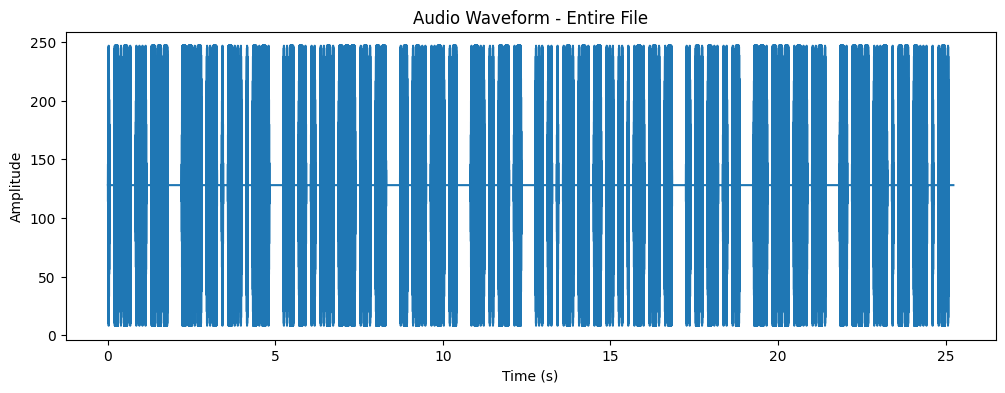

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(audio)) / sample_rate, audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform - Entire File')

plt.show()

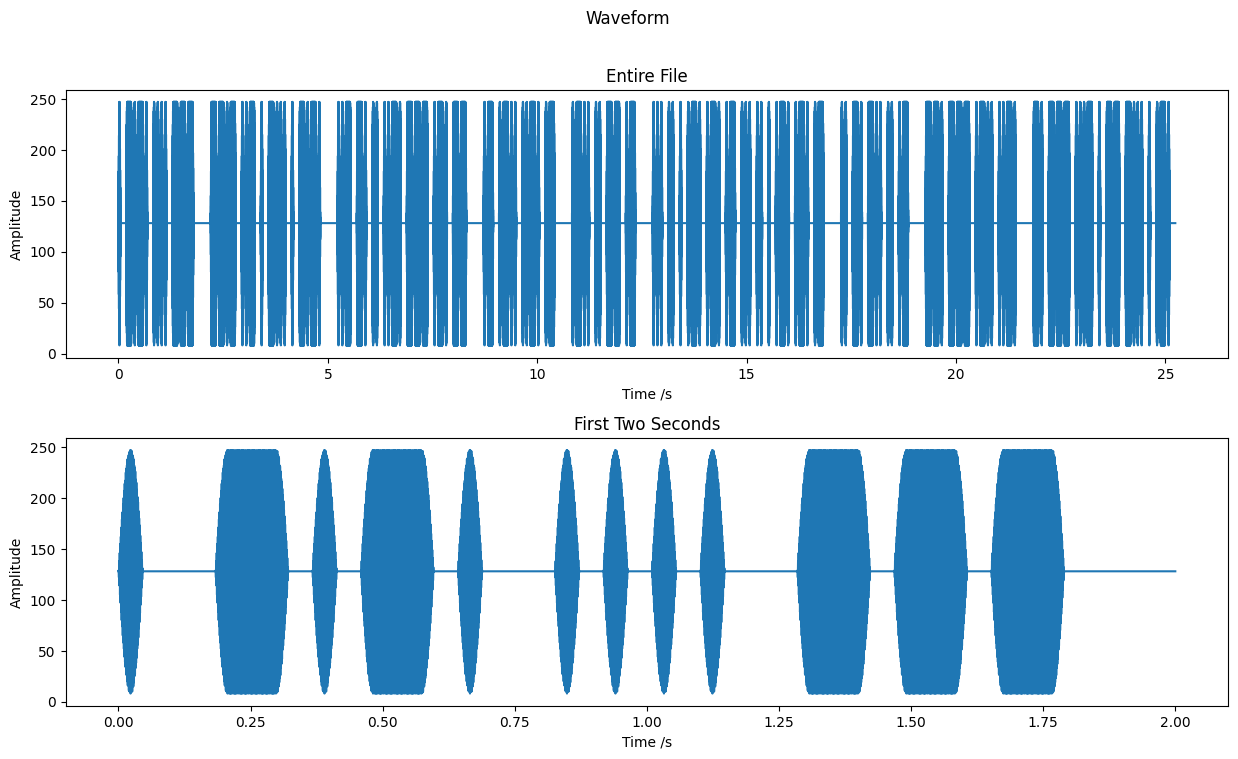

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(15,8))
plt.subplots_adjust(hspace=0.3)

axes[0].plot(t, audio)
axes[1].plot(t[:sample_rate * 2], audio[:sample_rate * 2])

fig.suptitle("Waveform")
axes[0].set_title("Entire File")
axes[1].set_title("First Two Seconds")

for ax in axes:
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time /s")


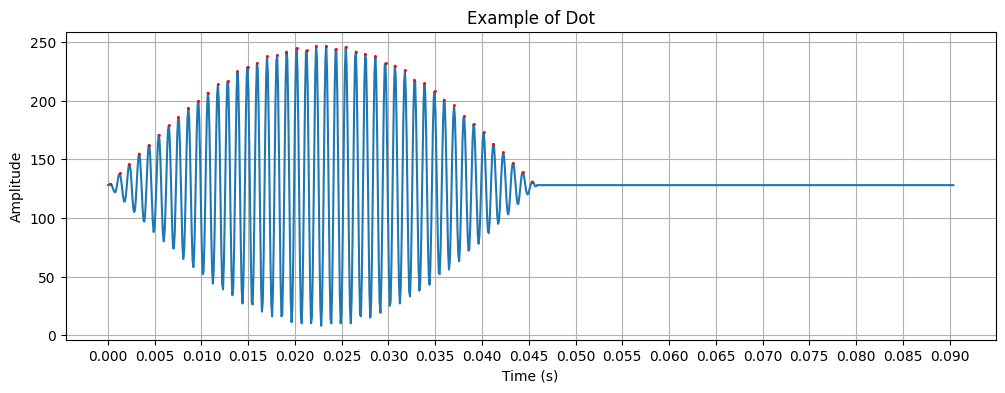

In [9]:
waveform = audio[0:1000]
threshold = 0.52
distance = 5

peaks, _ = signal.find_peaks(np.abs(waveform), height=threshold, distance=distance)

plt.figure(figsize=(12, 4))
plt.title('Example of Dot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(waveform)) / sample_rate, waveform)
plt.plot(peaks / sample_rate, waveform[peaks], 'ro', markersize=1)
plt.locator_params(axis='x', nbins=25)
plt.grid()
plt.show()

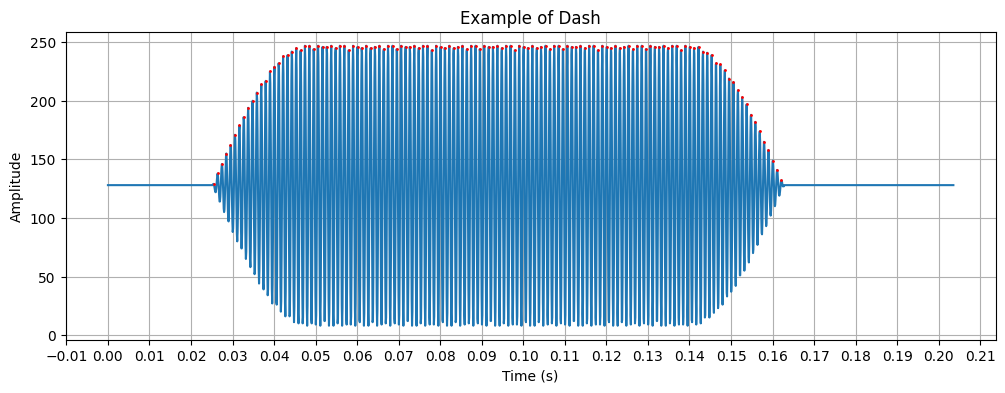

In [10]:
waveform = audio[1750:4000]
threshold = 0.52
distance = 5

peaks, _ = signal.find_peaks(np.abs(waveform), height=threshold, distance=distance)

plt.figure(figsize=(12, 4))
plt.title('Example of Dash')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(waveform)) / sample_rate, waveform)
plt.plot(peaks / sample_rate, waveform[peaks], 'ro', markersize=1)
plt.locator_params(axis='x', nbins=25)
plt.grid()
plt.show()

In [11]:
# smooth audio signal - square wave

peaks, _ = signal.find_peaks(audio, height=0.5, distance=35)

square_wave = np.zeros_like(audio)
square_wave[peaks] = 1

# Define a low-pass filter
cutoff_frequency = 500
nyquist = 0.5 * sample_rate
normal_cutoff = cutoff_frequency / nyquist
b, a = signal.butter(1, normal_cutoff, btype='low', analog=False)

# Apply the filter
smoothed_audio = signal.filtfilt(b, a, square_wave)

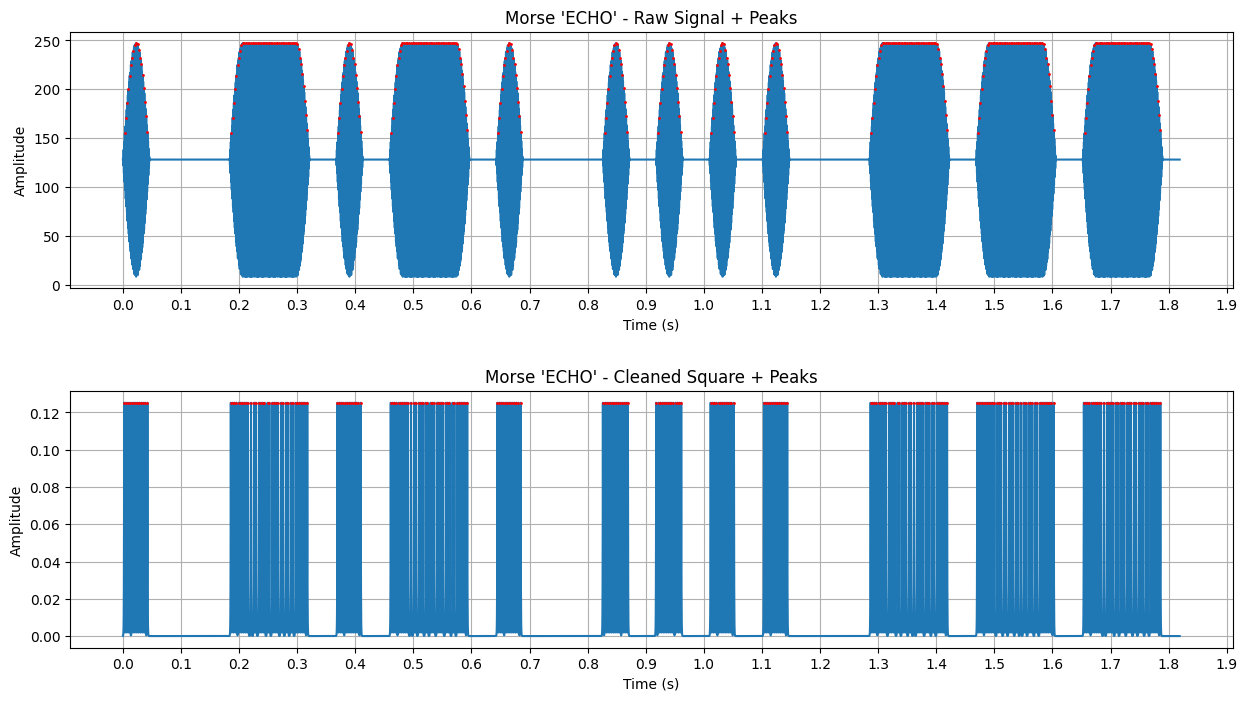

In [75]:
start, end = 0, 20100
ticks = 25

min_distance = 20

plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.4)

waveform = audio[start:end]
peaks, _ = signal.find_peaks(np.abs(waveform), height=150, distance=min_distance)

plt.subplot(2, 1, 1)
plt.title("Morse 'ECHO' - Raw Signal + Peaks")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(waveform)) / sample_rate, waveform)
plt.plot(peaks / sample_rate, waveform[peaks], 'ro', markersize=1)
plt.locator_params(axis='x', nbins=ticks)
plt.grid()

waveform = smoothed_audio[start:end]
peaks, _ = signal.find_peaks(np.abs(waveform), height=0.1, distance=min_distance)

plt.subplot(2, 1, 2)
plt.title("Morse 'ECHO' - Cleaned Square + Peaks")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(waveform)) / sample_rate, waveform)
plt.plot(peaks / sample_rate, waveform[peaks], 'ro', markersize=1)
plt.locator_params(axis='x', nbins=25)
plt.grid()

plt.show()

![audacity-screenshot.png](audacity-screenshot.png)

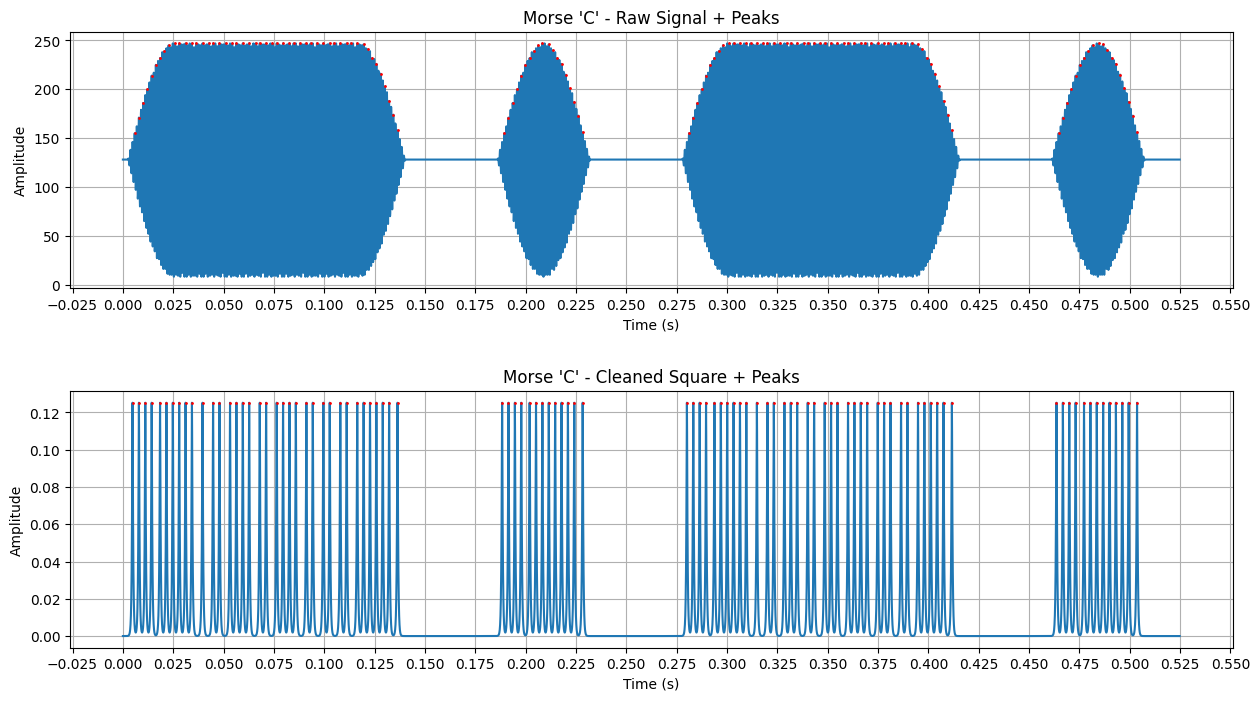

In [13]:
start, end = 2000, 7800
ticks = 25

min_distance = 20

plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.4)

waveform = audio[start:end]
peaks, _ = signal.find_peaks(np.abs(waveform), height=150, distance=min_distance)

plt.subplot(2, 1, 1)
plt.title("Morse 'C' - Raw Signal + Peaks")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(waveform)) / sample_rate, waveform)
plt.plot(peaks / sample_rate, waveform[peaks], 'ro', markersize=1)
plt.locator_params(axis='x', nbins=ticks)
plt.grid()

waveform = smoothed_audio[start:end]
peaks, _ = signal.find_peaks(np.abs(waveform), height=0.1, distance=min_distance)

plt.subplot(2, 1, 2)
plt.title("Morse 'C' - Cleaned Square + Peaks")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(waveform)) / sample_rate, waveform)
plt.plot(peaks / sample_rate, waveform[peaks], 'ro', markersize=1)
plt.locator_params(axis='x', nbins=25)
plt.grid()

plt.show()

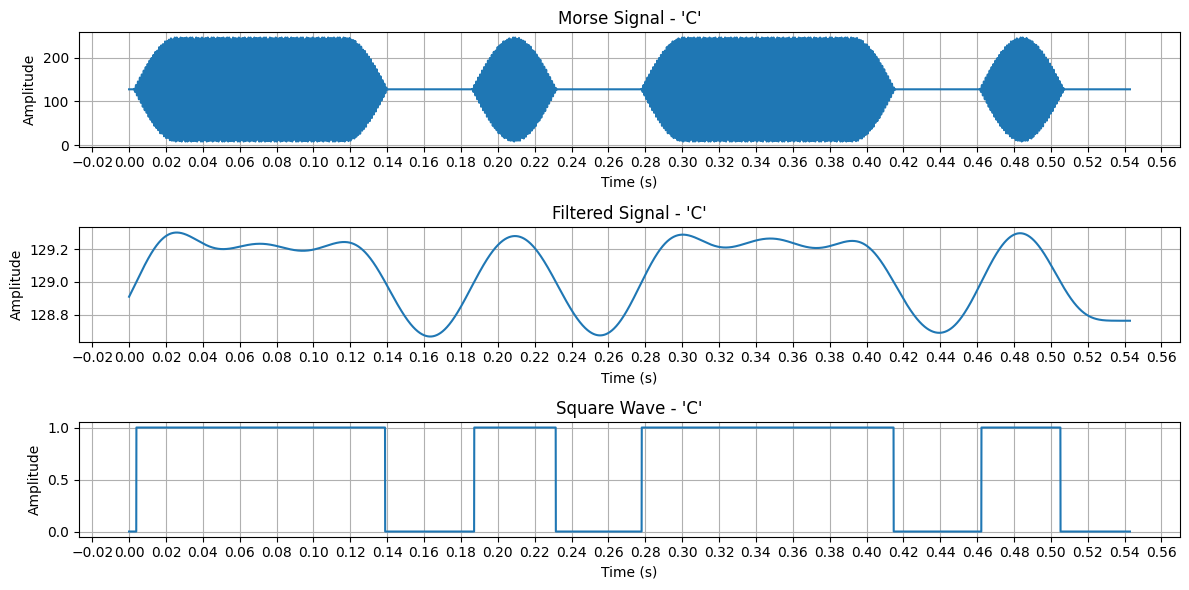

In [14]:
morse_signal = audio[2000:8000]

cutoff_frequency = 20
filter_order = 6

t = np.arange(len(morse_signal)) / sample_rate

b, a = signal.butter(filter_order, cutoff_frequency, fs=sample_rate, btype='lowpass')
filtered_wave = signal.filtfilt(b, a, 1 - morse_signal)

threshold = 129
square_wave = (filtered_wave > threshold).astype(int)

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, morse_signal)
plt.title("Morse Signal - 'C'")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.locator_params(axis='x', nbins=50)
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, filtered_wave)
plt.title("Filtered Signal - 'C'")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.locator_params(axis='x', nbins=50)
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, square_wave)
plt.title("Square Wave - 'C'")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.locator_params(axis='x', nbins=50)
plt.grid()

plt.tight_layout()
plt.show()

In [156]:
dot_duration = 0.075
dash_duration = 0.15
space_duration = 0.3

def audio_to_square_wave(morse_signal, sample_rate):
    cutoff_frequency = 20
    filter_order = 6
    t = np.arange(len(morse_signal)) / sample_rate
    b, a = signal.butter(filter_order, cutoff_frequency, fs=sample_rate, btype='lowpass')
    filtered_wave = signal.filtfilt(b, a, 1 - morse_signal)
    threshold = 129
    square_wave = (filtered_wave > threshold).astype(int)
    return square_wave

def square_wave_to_morse(square_wave, dot_duration, dash_duration, space_duration):
    square_diff = np.diff(square_wave)
    t = np.arange(len(morse_signal)) / sample_rate
    
    rising_idx = np.nonzero(square_diff == 1)[0]
    falling_idx = np.nonzero(square_diff == -1)[0]

    rise_times = t[rising_idx]
    fall_times = t[falling_idx]

    morse_code = []
    for rise_time, fall_time in zip(rise_times, fall_times):
        duration = fall_time - rise_time

        if duration < dot_duration:
            morse_code.append('.')
        elif duration < dash_duration:
            morse_code.append('-')
        elif duration < space_duration:
            morse_code.append(' ')
        else:
            morse_code.append('|')
    return ''.join(morse_code)

morse_mapping = {
    '.-': 'A', '-...': 'B', '-.-.': 'C', '-..': 'D', '.': 'E',
    '..-.': 'F', '--.': 'G', '....': 'H', '..': 'I', '.---': 'J',
    '-.-': 'K', '.-..': 'L', '--': 'M', '-.': 'N', '---': 'O',
    '.--.': 'P', '--.-': 'Q', '.-.': 'R', '...': 'S', '-': 'T',
    '..-': 'U', '...-': 'V', '.--': 'W', '-..-': 'X', '-.--': 'Y',
    '--..': 'Z', '-----': '0', '.----': '1', '..---': '2', '...--': '3',
    '....-': '4', '.....': '5', '-....': '6', '--...': '7', '---..': '8',
    '----.': '9', '/': ' ', '': ' '
}

def morse_to_text(morse_code):
    words = morse_code.split('|')
    decoded = ''
    
    for word in words:
        letters = word.split()
        for letter in letters:
            if letter in morse_mapping:
                decoded += morse_mapping[letter]
            else:
                decoded += '?'
        decoded += ' '
    return decoded.strip()

In [157]:
morse_signal = audio[2000:8000]

square_wave = audio_to_square_wave(morse_signal, sample_rate)

morse = square_wave_to_morse(square_wave, dot_duration, dash_duration, space_duration)
print('Morse', '[' + str(len(morse)) + ']:', morse)

decoded = morse_to_text(morse)
print("Decoded:  ", decoded)

Morse [4]: -.-.
Decoded:   C


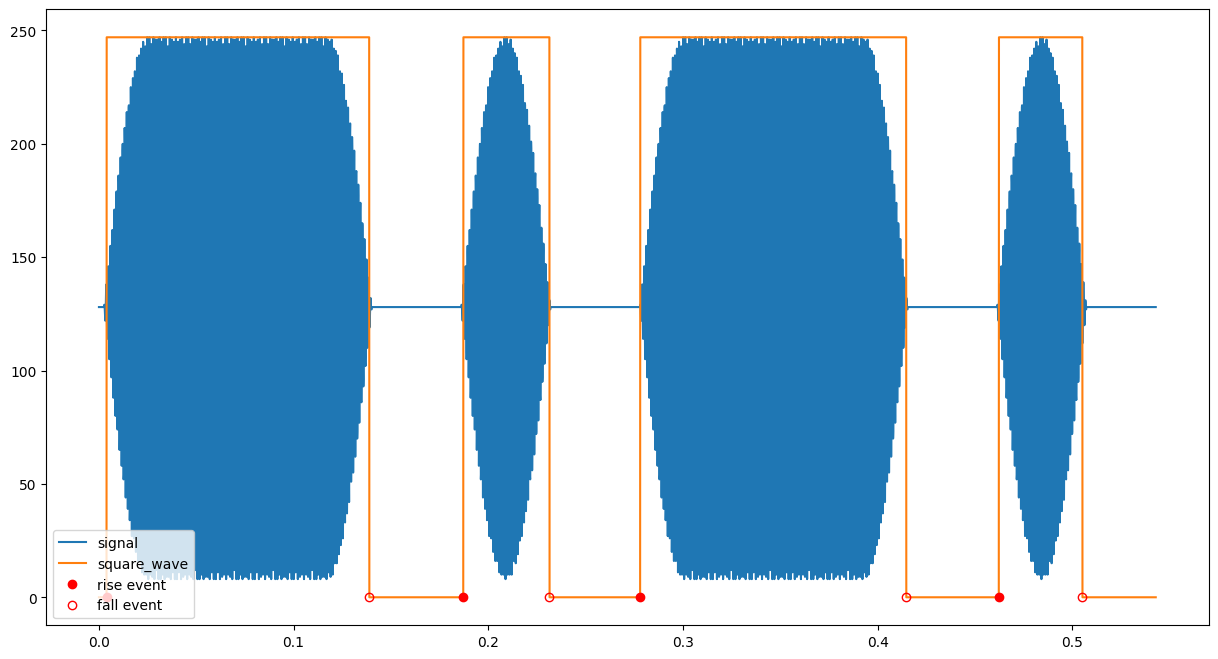

In [173]:
morse_signal = audio[2000:8000]
t = np.arange(len(morse_signal)) / sample_rate

square_wave = audio_to_square_wave(morse_signal, sample_rate)
square_diff = np.diff(square_wave)

rising_idx = np.nonzero(square_diff == 1)[0]
falling_idx = np.nonzero(square_diff == -1)[0]

rise_times = t[rising_idx]
fall_times = t[falling_idx]

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(t[:sample_rate*2], morse_signal[:sample_rate*2], label="signal")
ax.plot(t[:sample_rate*2], square_wave[:sample_rate*2]*max(morse_signal), label="square_wave")

ax.plot(rise_times[rise_times<2], np.zeros(sum(rise_times<2)), "ro", label="rise event")
ax.plot(fall_times[fall_times<2], np.zeros(sum(fall_times<2)), "ro", fillstyle="none", label="fall event")

ax.legend()

In [174]:
morse_signal = audio[0:20100]

square_wave = audio_to_square_wave(morse_signal, sample_rate)

morse = square_wave_to_morse(square_wave, dot_duration, dash_duration, space_duration)
print('Morse', '[' + str(len(morse)) + ']:', morse)

decoded = morse_to_text(morse)
print("Decoded:  ", decoded)

Morse [12]: .-.-.....---
Decoded:   ?


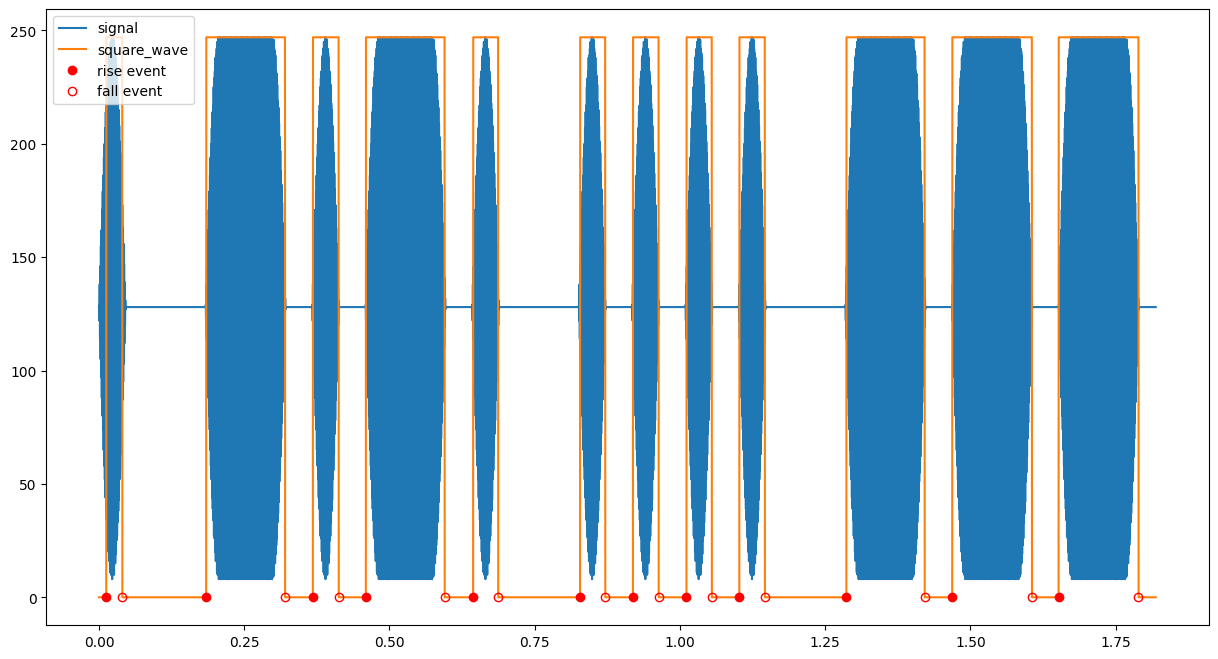

In [175]:
morse_signal = audio[0:20100]
t = np.arange(len(morse_signal)) / sample_rate

square_wave = audio_to_square_wave(morse_signal, sample_rate)
square_diff = np.diff(square_wave)

rising_idx = np.nonzero(square_diff == 1)[0]
falling_idx = np.nonzero(square_diff == -1)[0]

rise_times = t[rising_idx]
fall_times = t[falling_idx]

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(t[:sample_rate*2], morse_signal[:sample_rate*2], label="signal")
ax.plot(t[:sample_rate*2], square_wave[:sample_rate*2]*max(morse_signal), label="square_wave")

ax.plot(rise_times[rise_times<2], np.zeros(sum(rise_times<2)), "ro", label="rise event")
ax.plot(fall_times[fall_times<2], np.zeros(sum(fall_times<2)), "ro", fillstyle="none", label="fall event")

ax.legend()